```
JUPYTER_CONFIG_DIR=$PWD/profile \ 
jupyter notebook --NotebookApp.allow_origin="*"
```

In [1]:
from IPython.display import Image

# Introduction

- sustainability
- presentation / dissemination
- data management & interoperability
- connect to / annotate MP data
- generating data and developing frameworks  

*data dissemination/management as efficient as MP!*

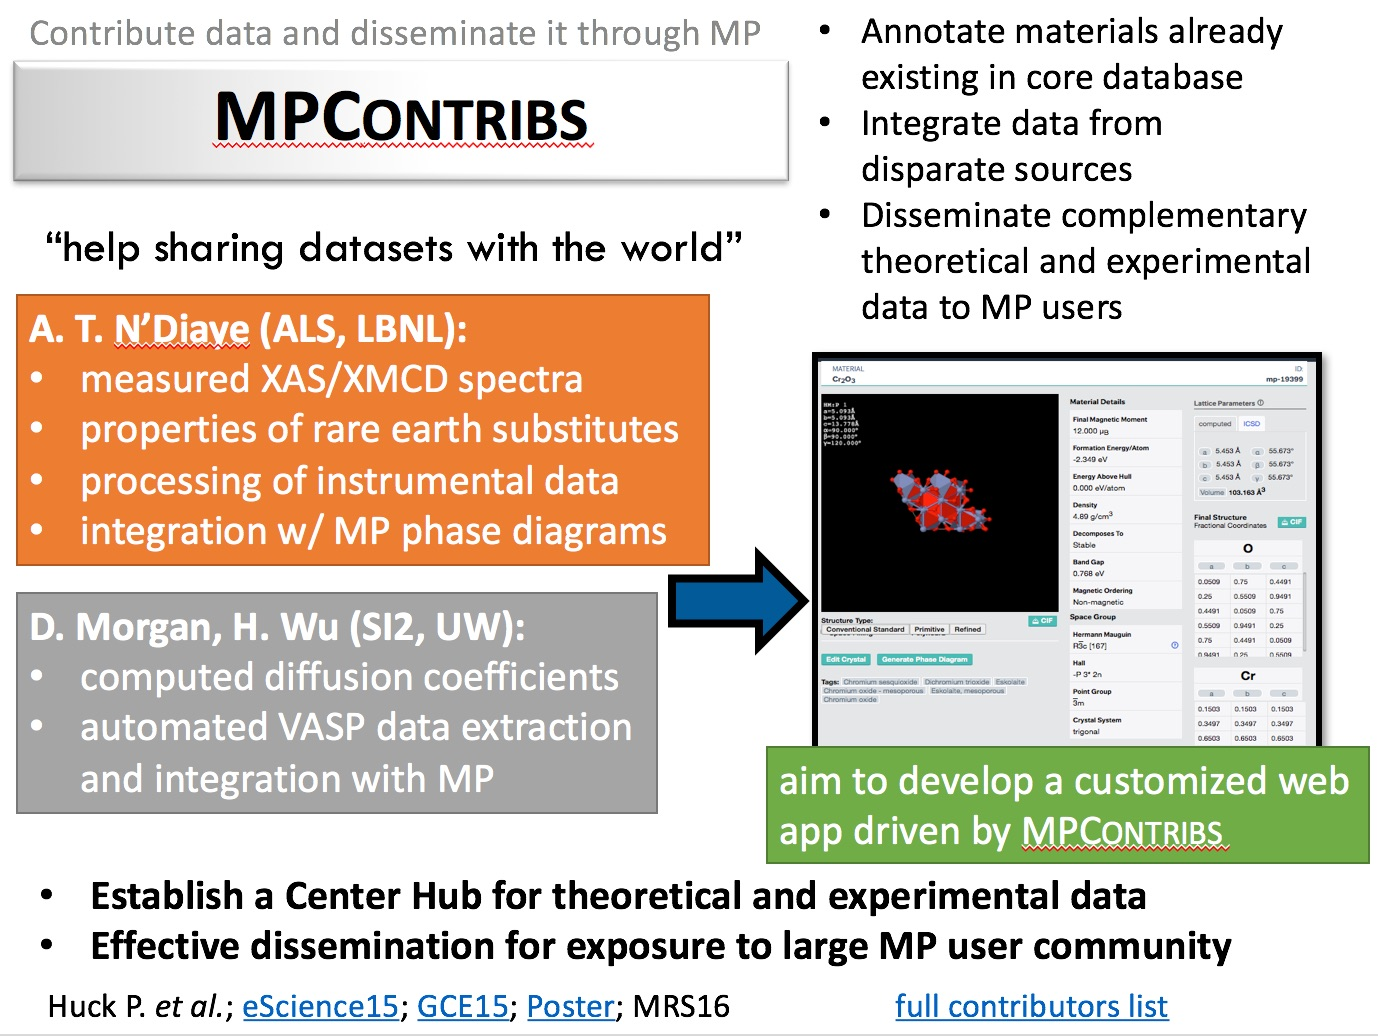

In [2]:
Image(filename="mpcontribs_slide1.jpg")

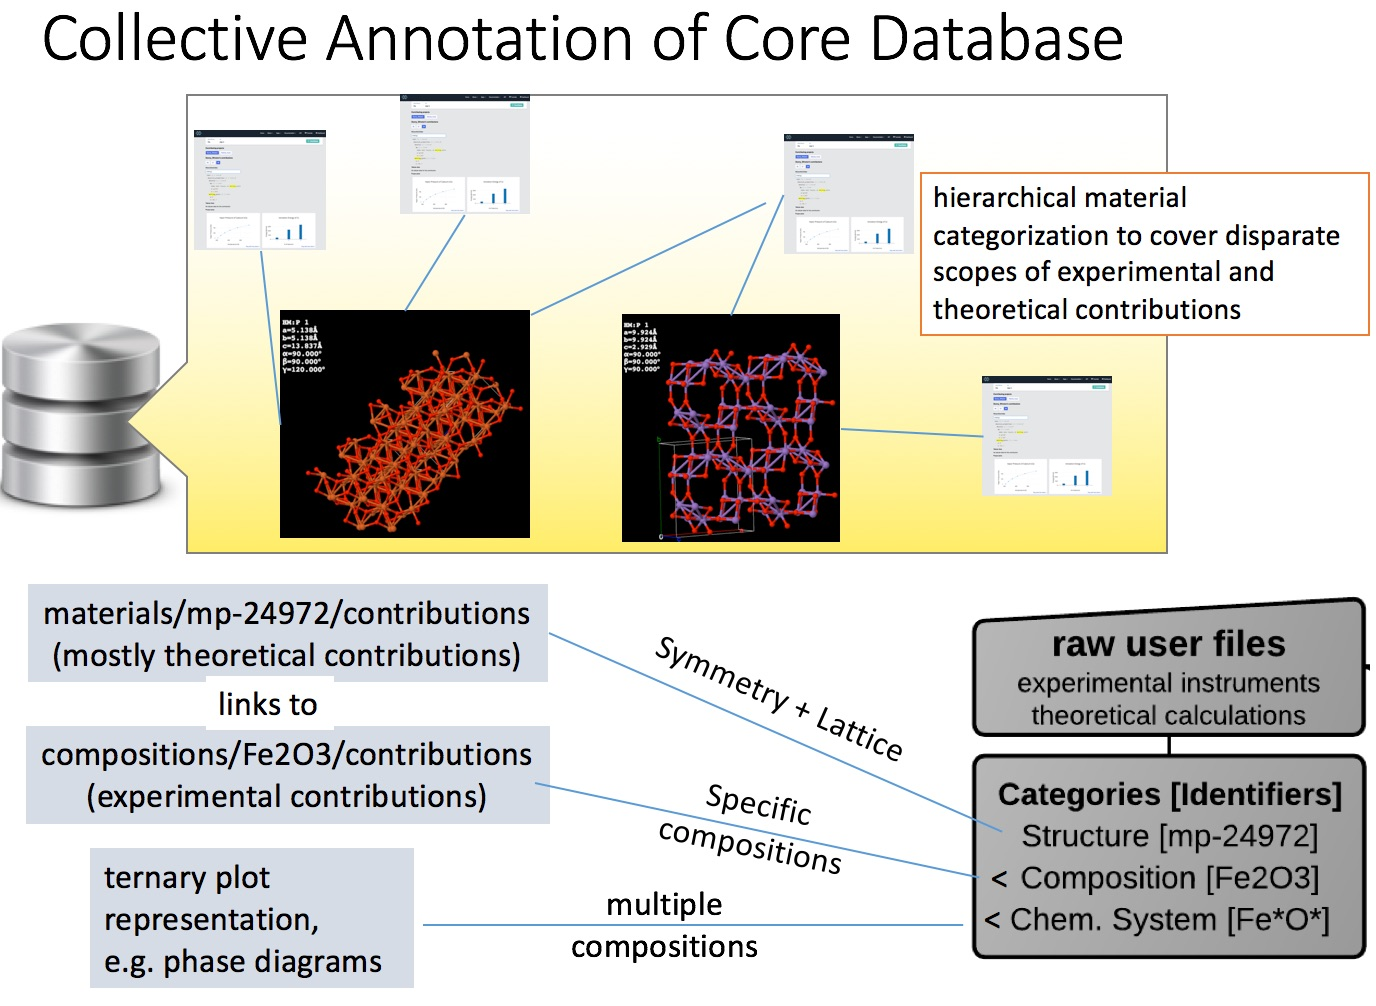

In [3]:
Image(filename="mpcontribs_slide2.jpg")

# UW/SI2 Video Demo

https://www.youtube.com/watch?v=wbWde5StHnU (3:43min)

# Live Demo of UW/SI2 Use Case

In UW/SI2 use case, the publication-ready data is shared among authors and collaborators via Excel sheets and made available to the public through [FigShare](https://figshare.com).

https://figshare.com/articles/DFT_dilute_solute_diffusion_in_Al_Cu_Ni_Pd_Pt_and_Mg/1546772

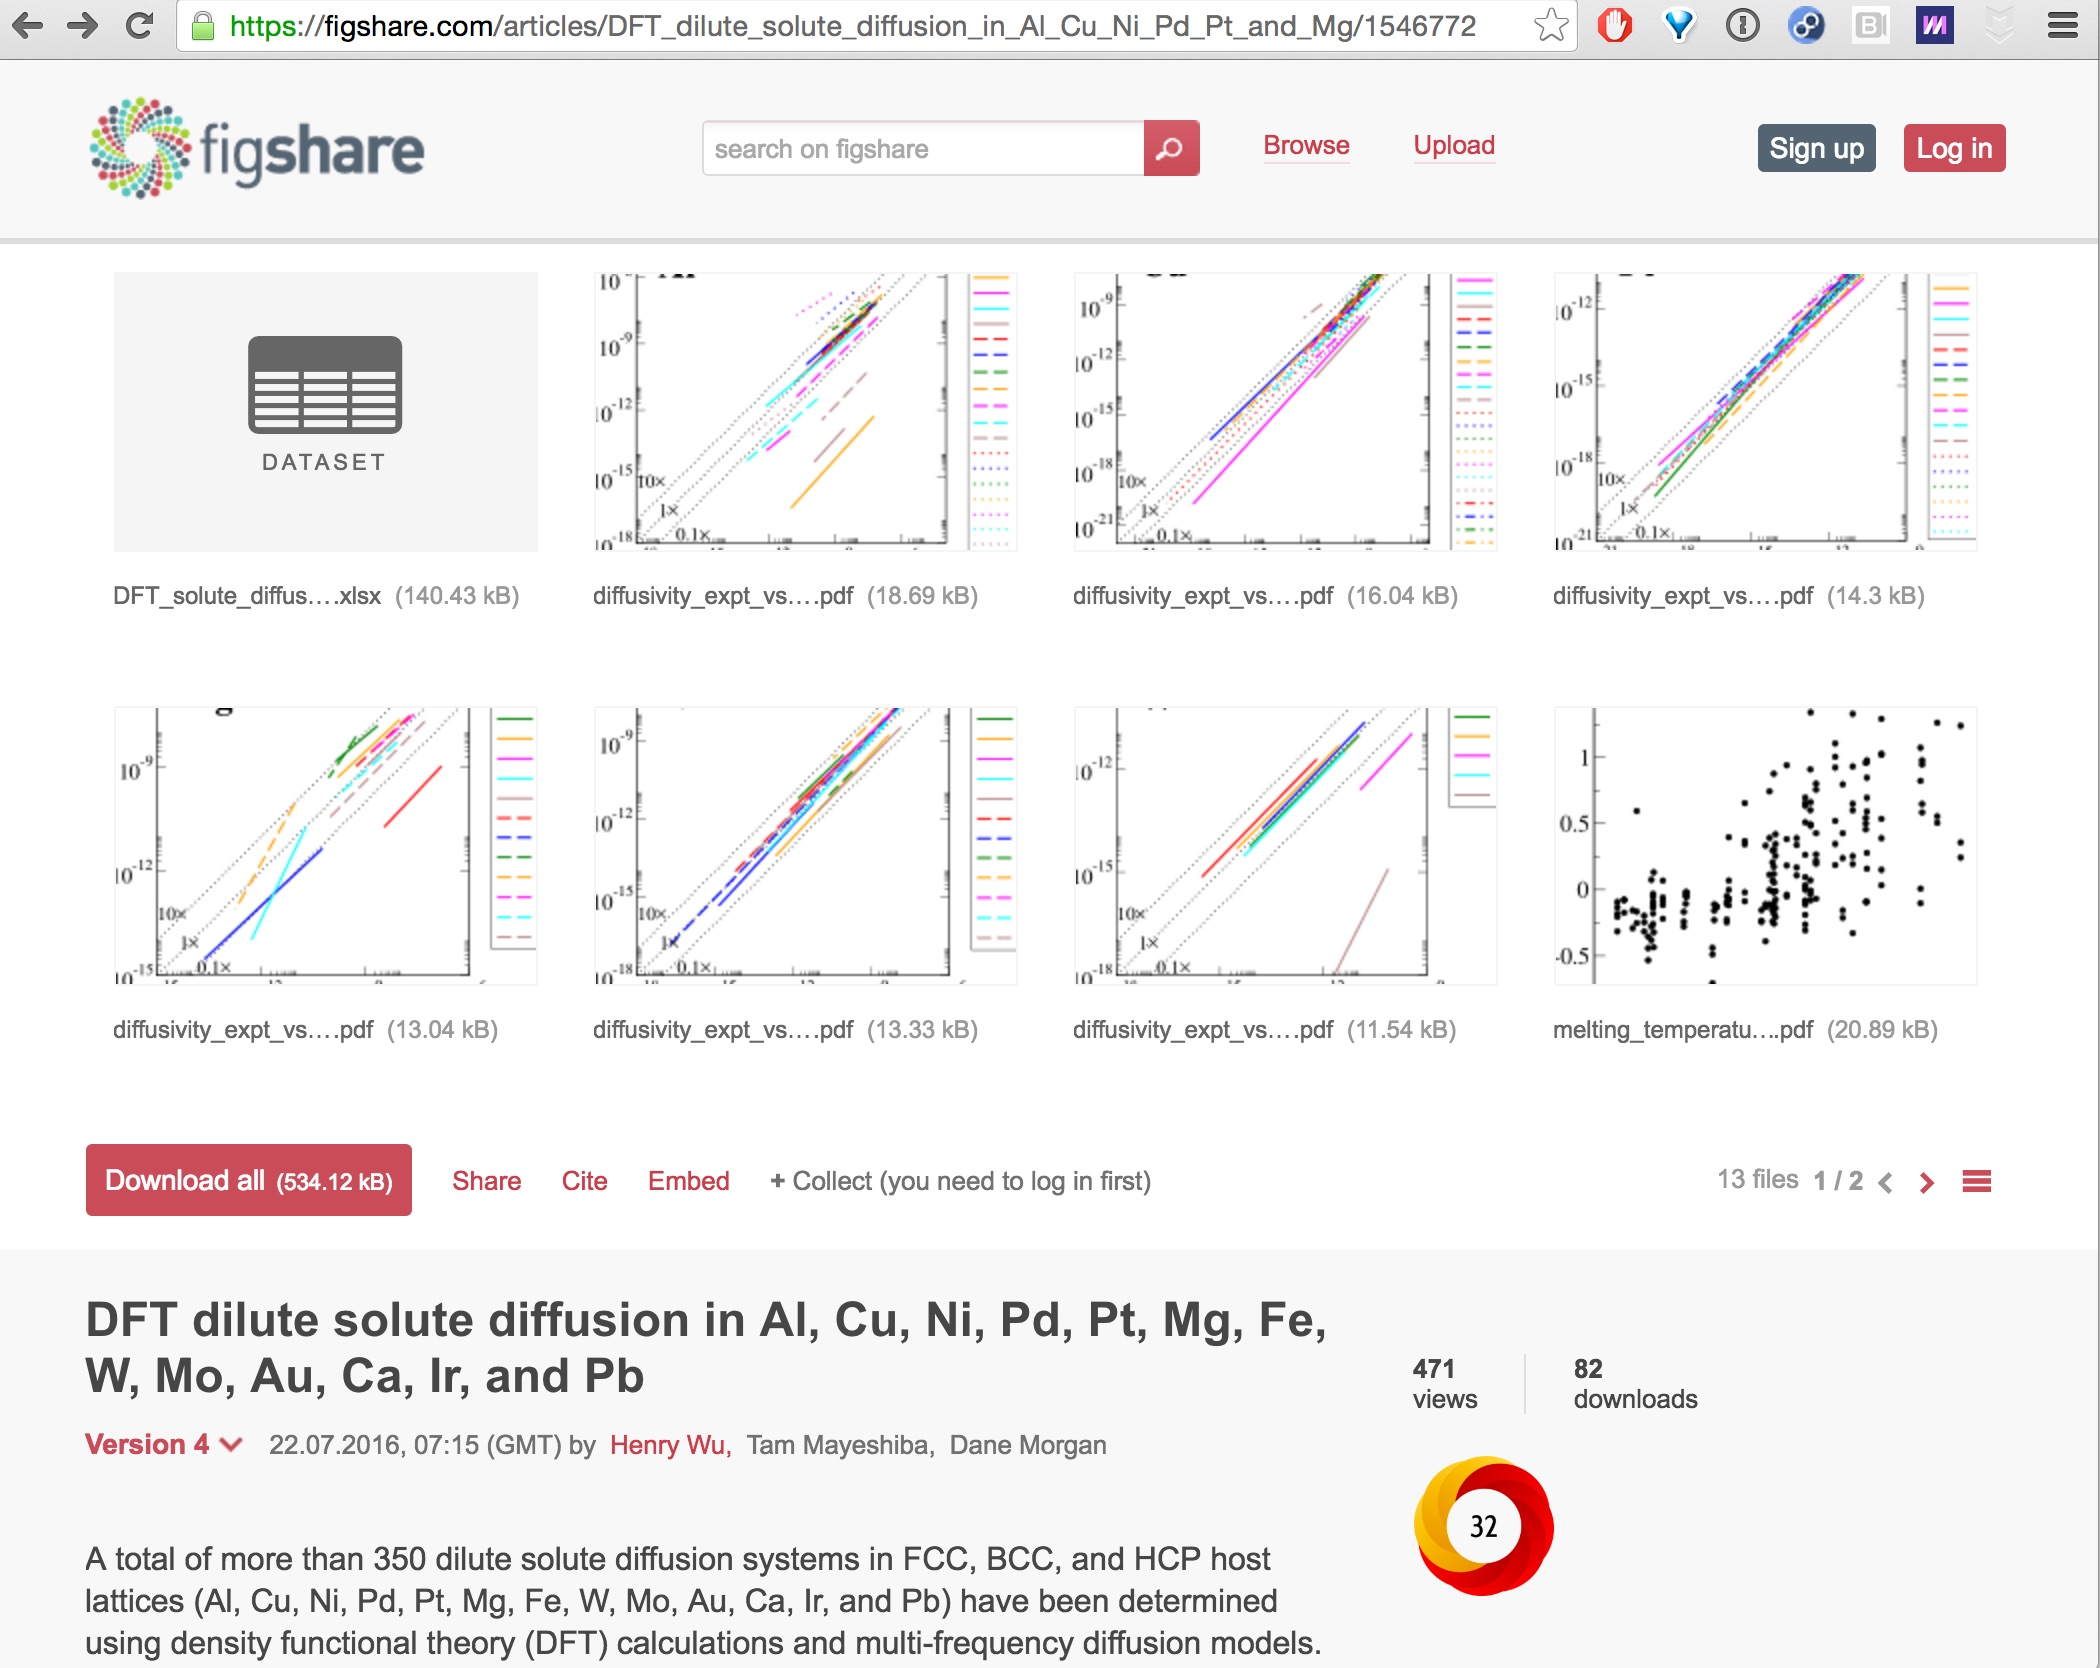

In [4]:
Image(filename="figshare_1546772.jpg")

## Start MPContribs

In [4]:
!mpcontribs -h

usage: mpcontribs [-h] [--sbx SBX] [--debug] [--start-jupyter] [--jupyter-url URL]

Command Line Interface for MPContribs WebUI

optional arguments:
  -h, --help         show this help message and exit
  --sbx SBX          ArchieML Sandbox Content (default: None)
  --debug            run in debug mode (default: False)
  --start-jupyter    start Jupyter server (default: False)
  --jupyter-url URL  Jupyter URL (default: http://localhost:8888)


In [7]:
!mpcontribs --sbx "figshare_id: 1546772"

using gsed
info: Done.
static files collected.
 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Aug/2016 23:56:36] "GET / HTTP/1.1" 200 -
killed mongod
mongod started.
127.0.0.1 - - [10/Aug/2016 23:56:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Aug/2016 23:56:40] "POST /action HTTP/1.1" 302 -
127.0.0.1 - - [10/Aug/2016 23:56:40] "GET /load HTTP/1.1" 200 -
127.0.0.1 - - [10/Aug/2016 23:56:57] "GET /static/js/lib/backbone-min.map; HTTP/1.1" 404 -
killed mongod
127.0.0.1 - - [10/Aug/2016 23:57:13] "GET /shutdown HTTP/1.1" 200 -
mongod started.


- using UW/SI2's FigShare ID as input (to ArchieML sandbox)
- MPContribs UI at http://localhost:5000

## Pre-Process / Prepare / Review Data

- select `uw_si2` as project to inject FigShare processing code
- show `mpcontribs.users.uw_si2.pre_submission` processing [code](https://github.com/materialsproject/MPContribsUsers/blob/master/uw_si2/pre_submission.py#L23)

### *Load MPFile*

- run Jupyter cell with couple of hosts, i.e. `hosts=['Cu', 'Al']`
- resulting MPFile loaded in memory/session (click *Save MPFile* to download)

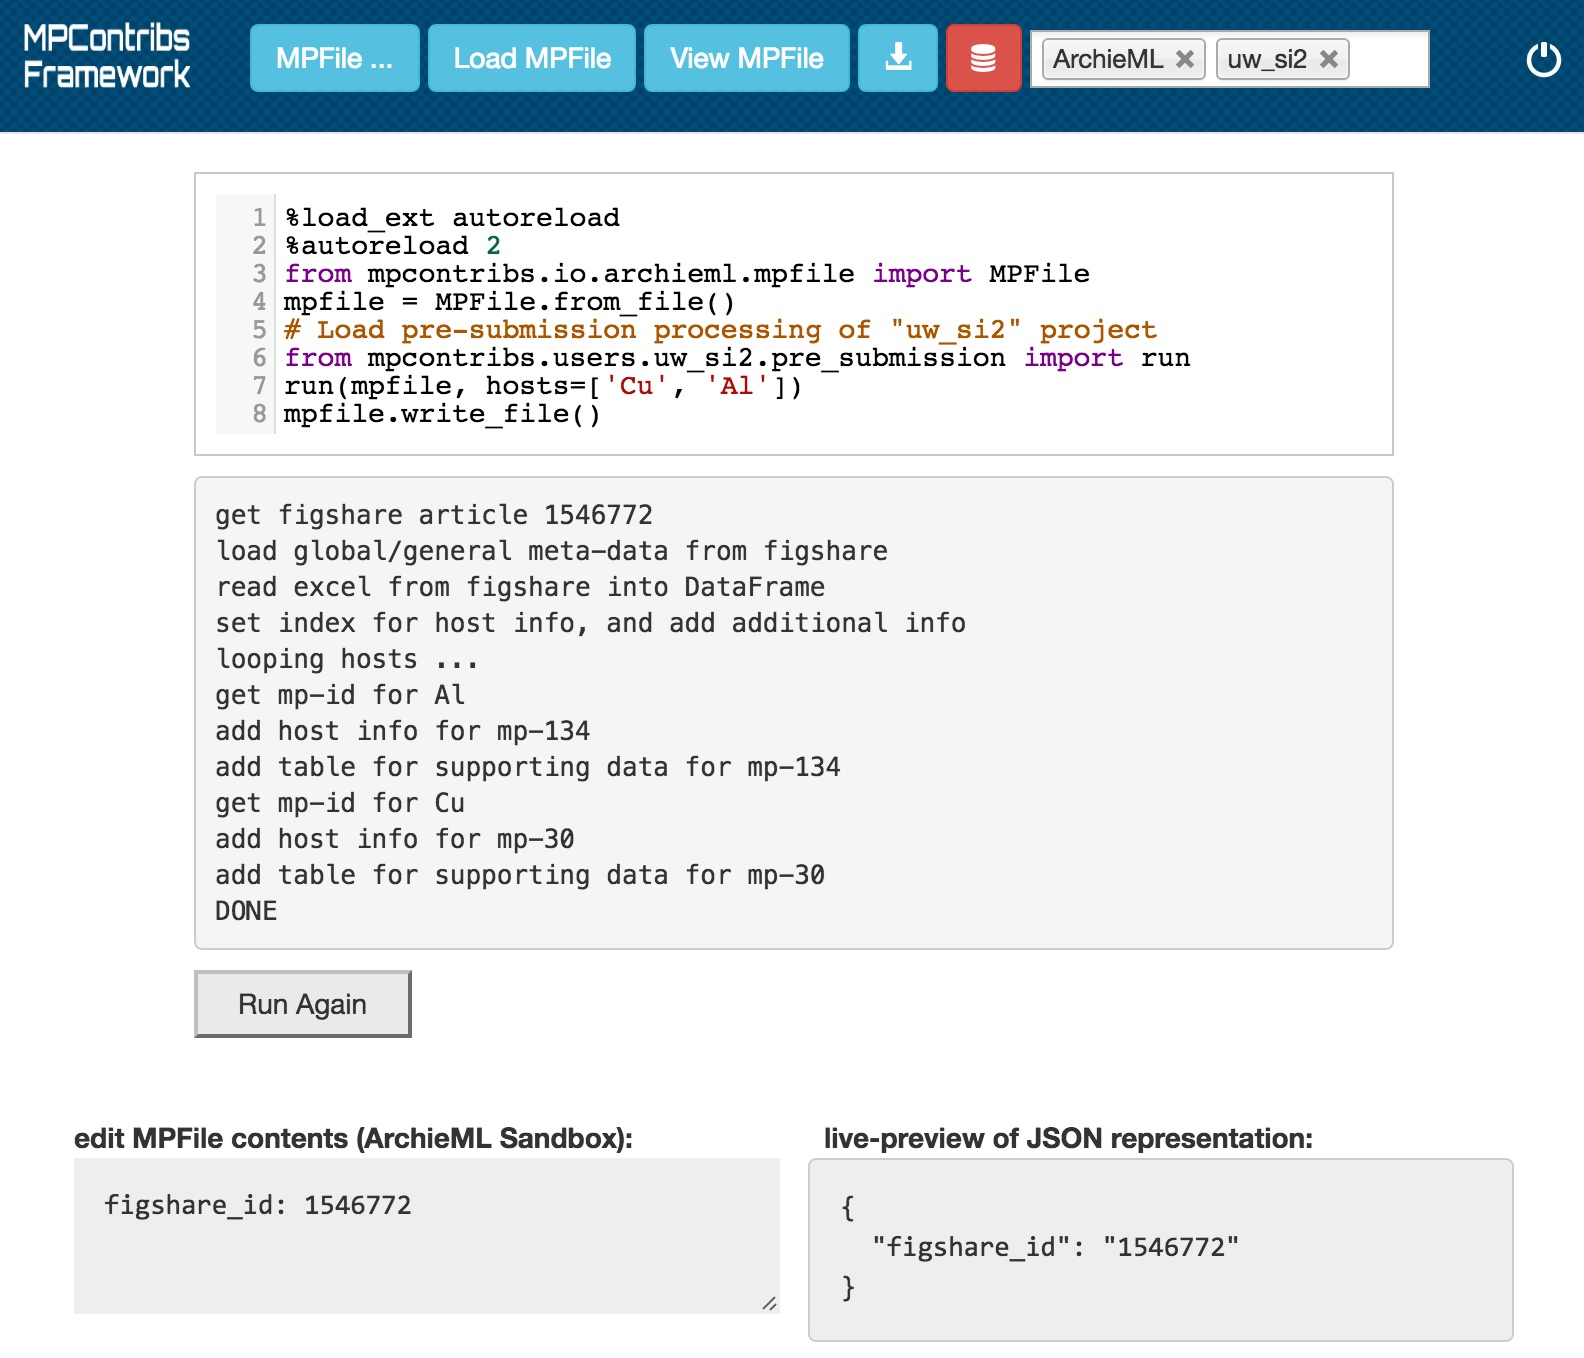

In [5]:
Image(filename="load_mpfile.jpg")

### *View MPFile*

- toggle hierarchical data, tables, graphs, and notebook inputs
- jump to contribution, back to top
- sort table by solute element name
- hover interactive graph, (de-)select traces in legend
- download graph as png, save to plotly cloud, zoom/reset
- overview plot of lattice constant vs melting temperature vs vac. formation energy
- click data point in overview plot to jump to contribution

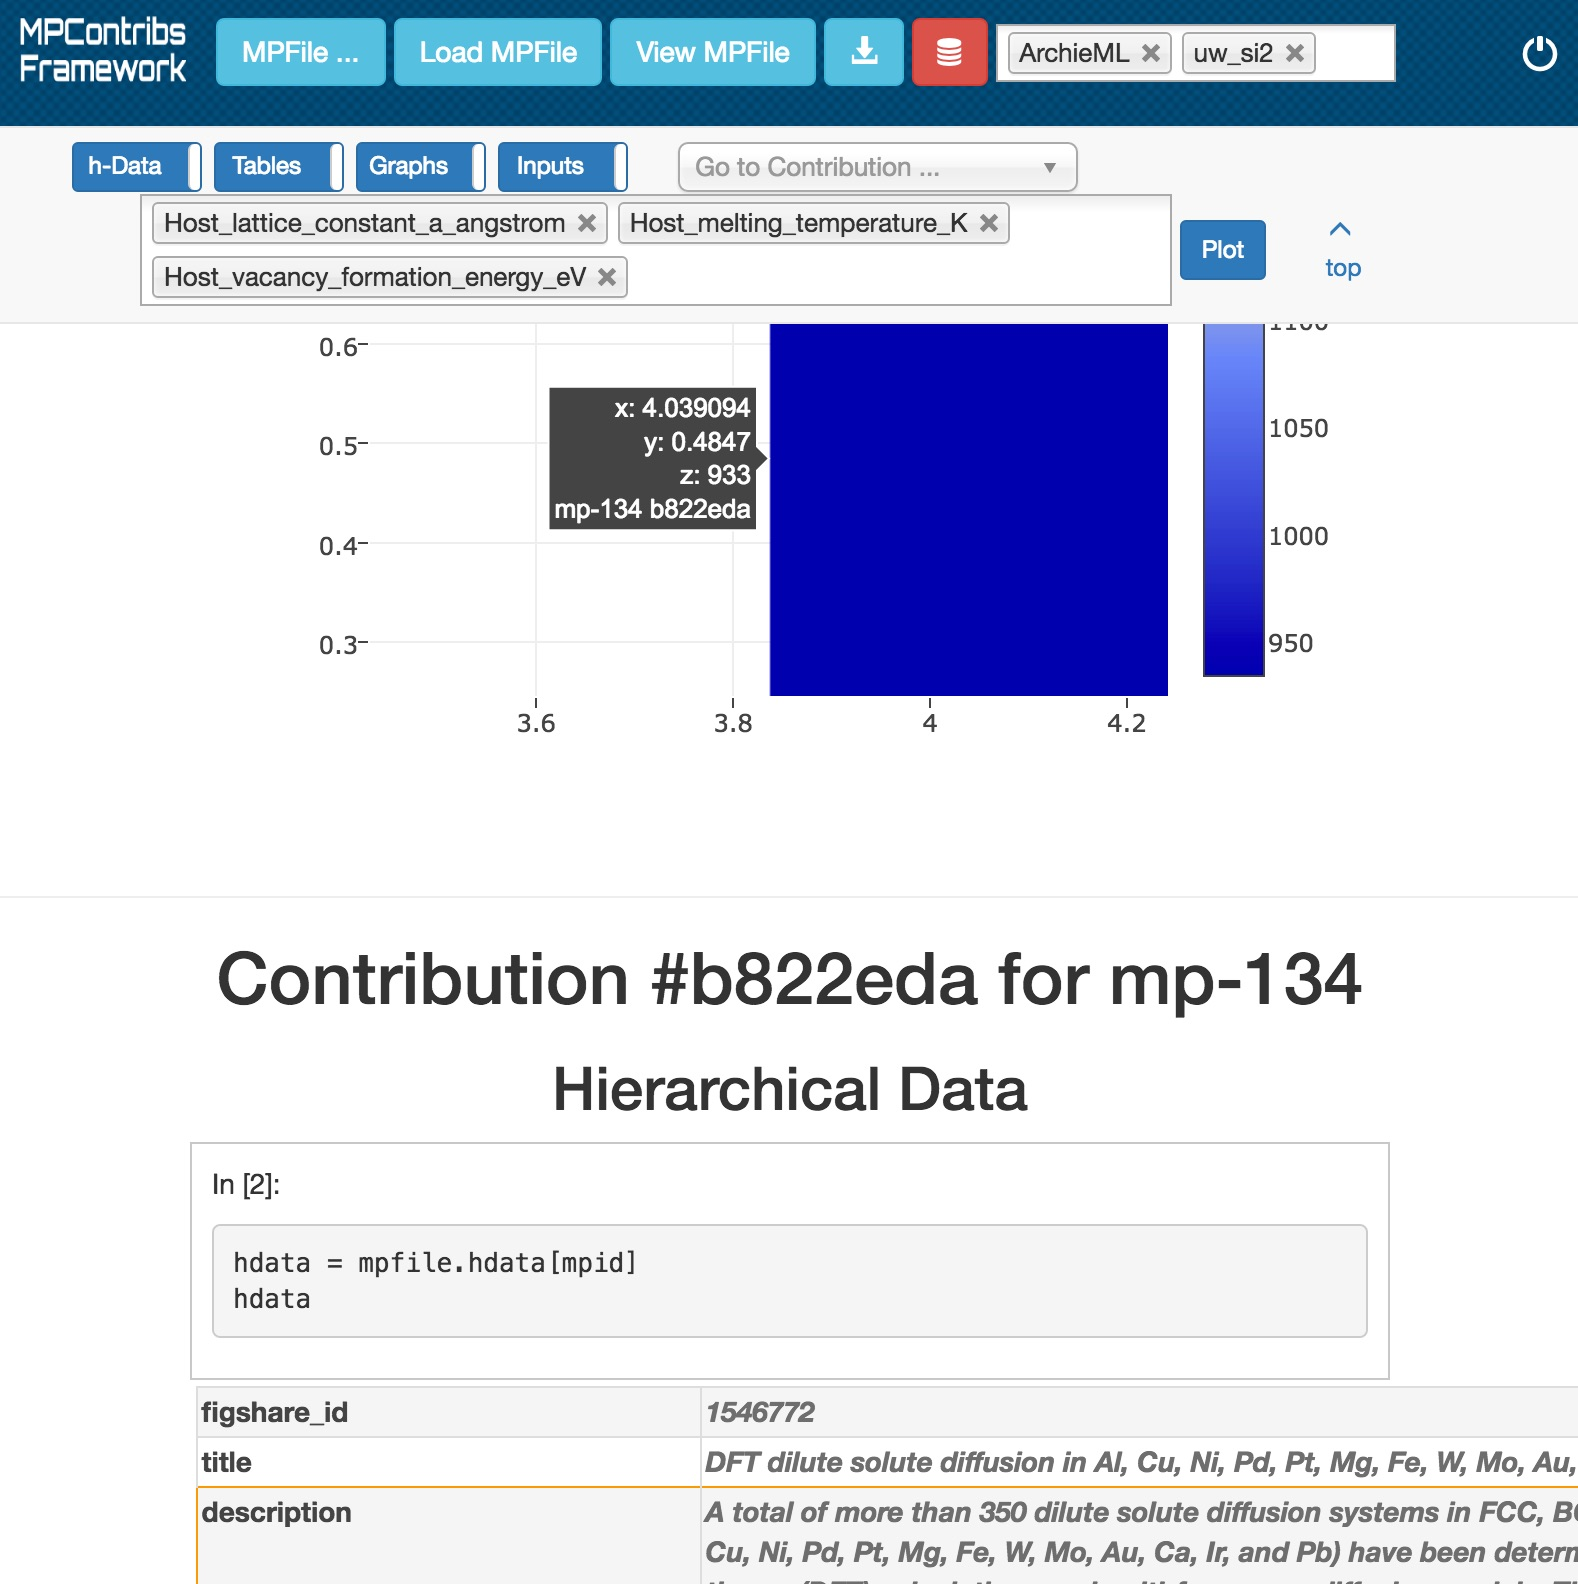

In [6]:
Image(filename="view_mpfile.jpg")

## Contribute Data

### Setup / Test

- *webtzite* dashboard for API key (via `contribute-?` icon)
- MPContribs REST API at http://localhost:5000/test_site/mpcontribs/rest

### Submit

#### contribute-Go!

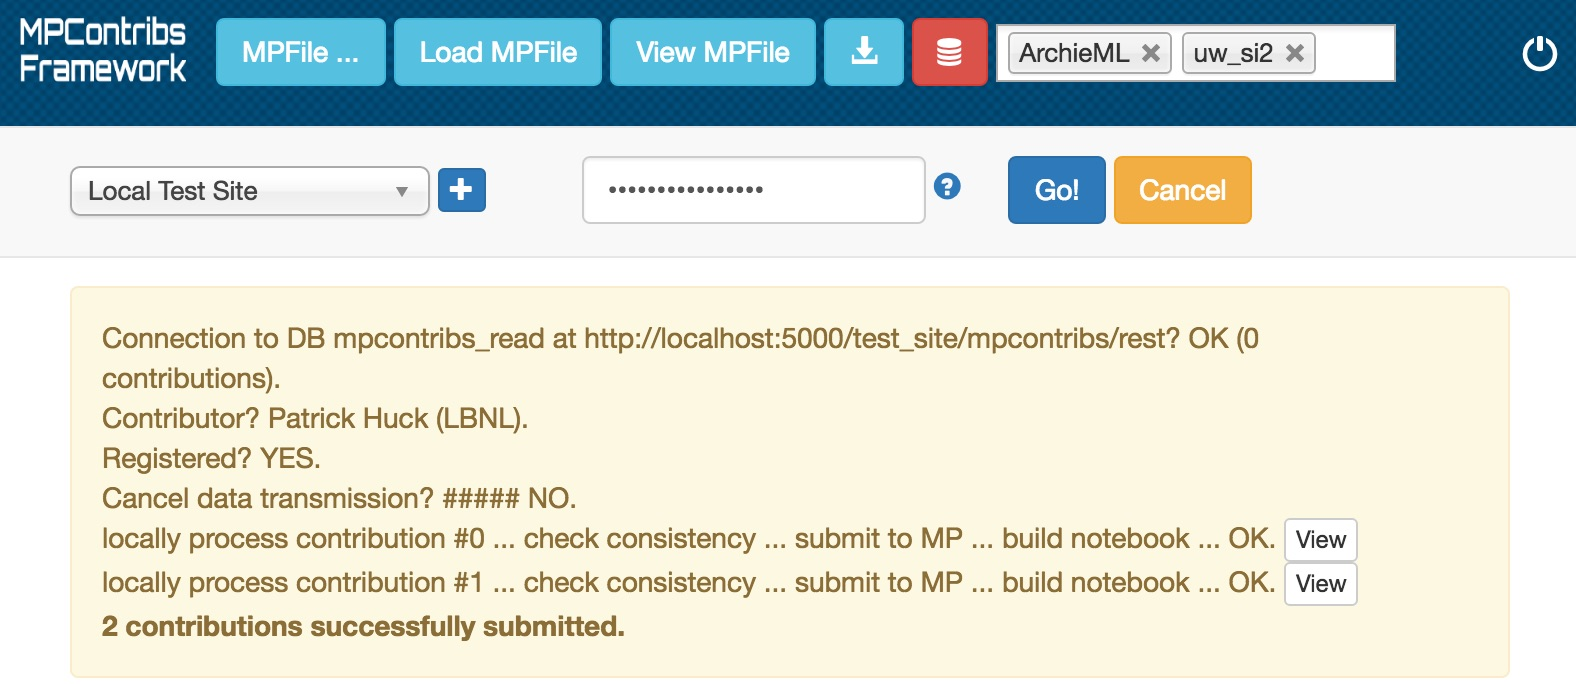

In [7]:
Image(filename="contribute_mpfile.jpg")

#### View Contribution Detail Page

Future:  
DOI assigned via MPCite for references,  
see https://www.youtube.com/watch?v=bHhuO4EOgEw

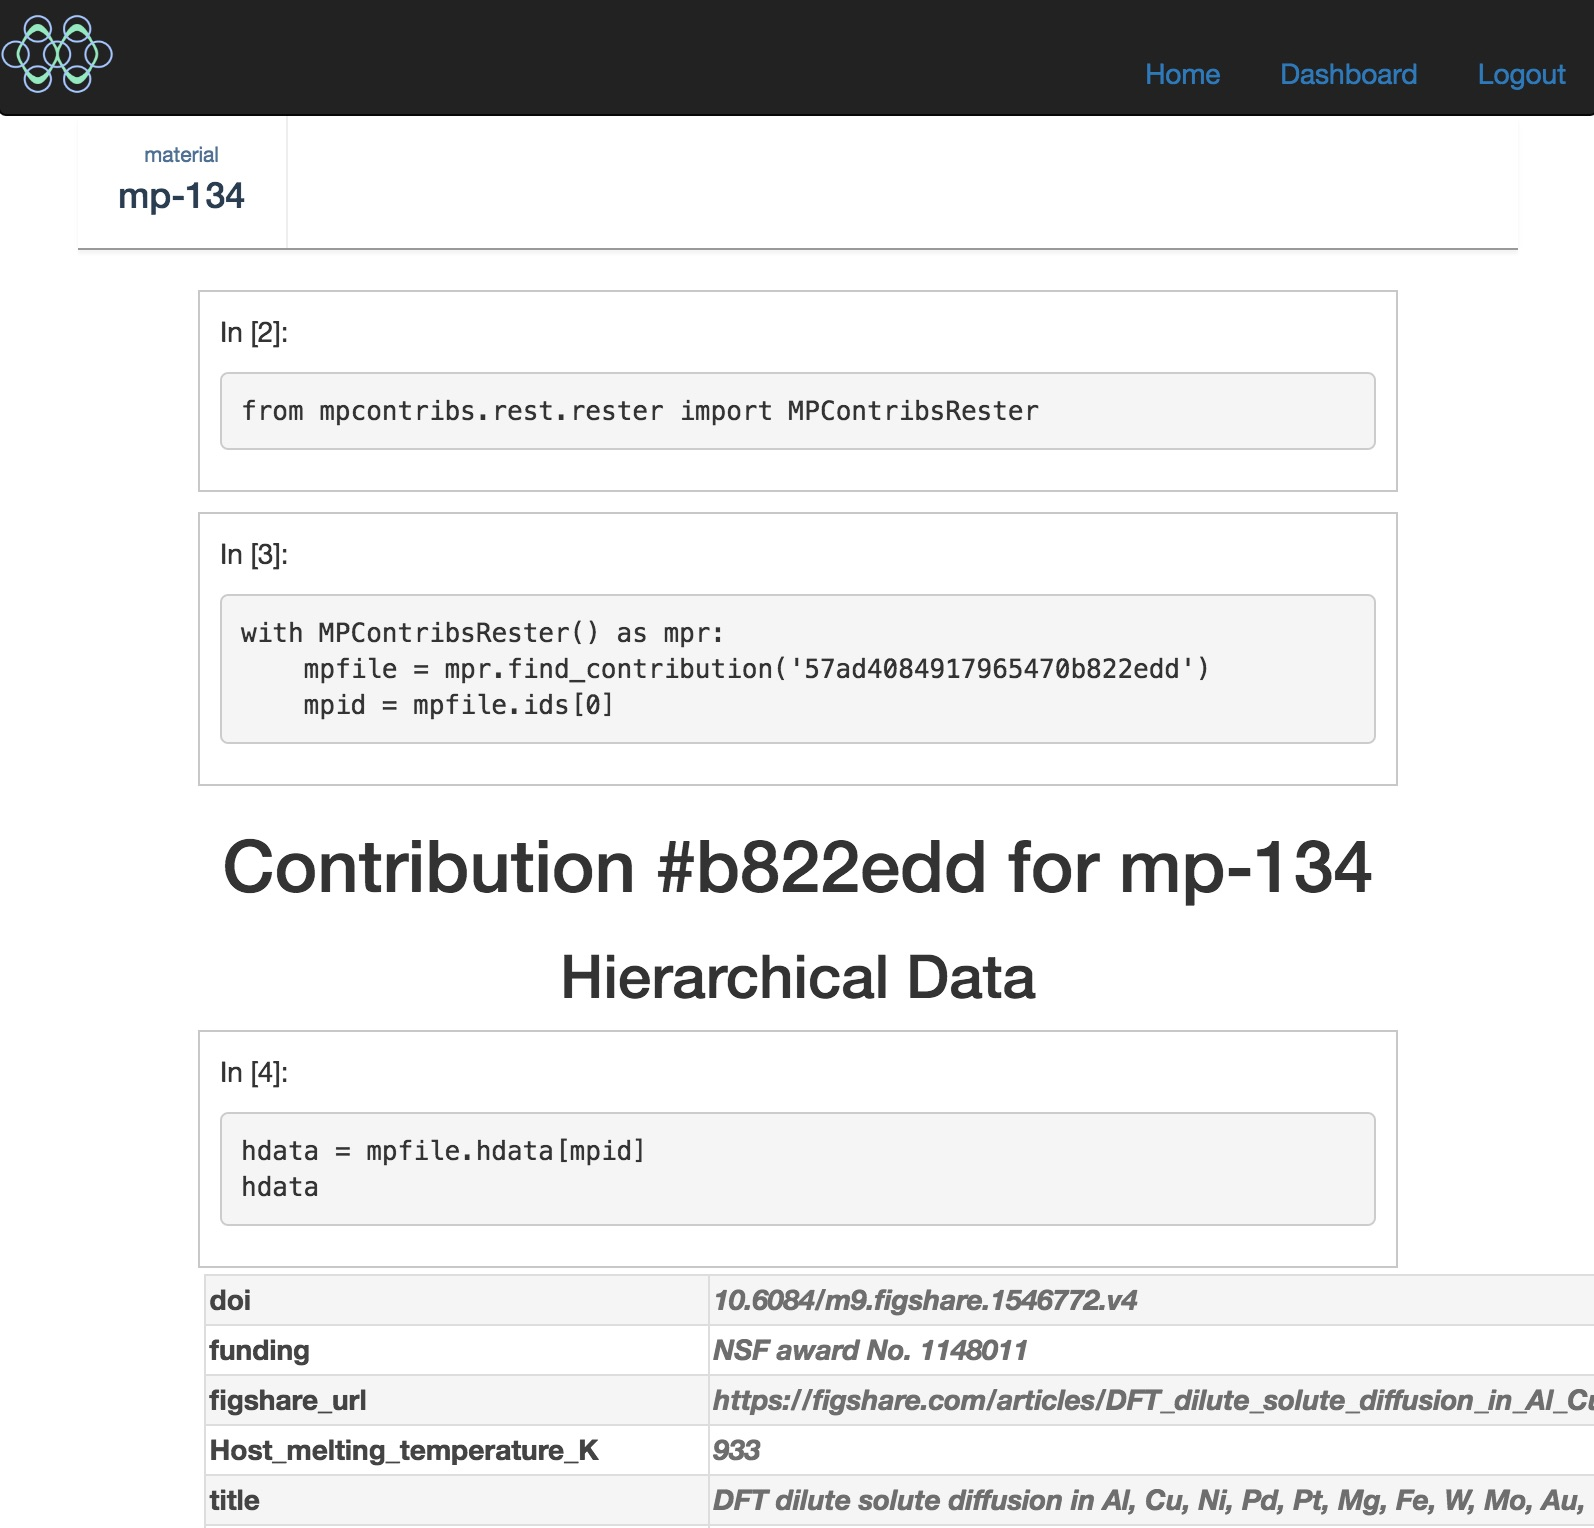

In [8]:
Image(filename="detail_page.jpg")

### Explore

#### via Generic UI

http://localhost:5000/test_site/mpcontribs/explorer/materials  
(will be improved to allow for graph-driven exploring)

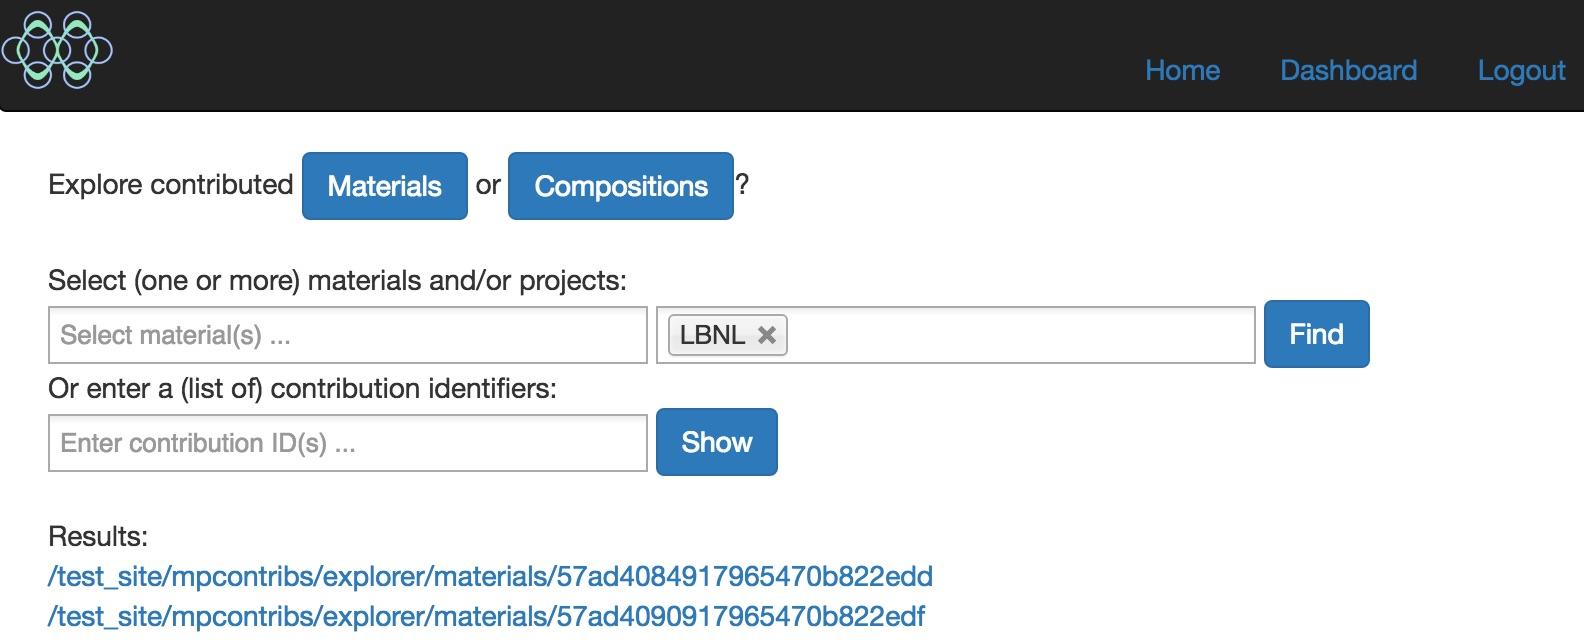

In [9]:
Image(filename="explore_generic.jpg")

#### via Project UI / WebApp

- http://localhost:5000/test_site/uwsi2/explorer
- repeating MPContribs cycle with `hosts=['Fe', 'Au']` would automatically show the new data in the UW/Si2 app (see introduction video)

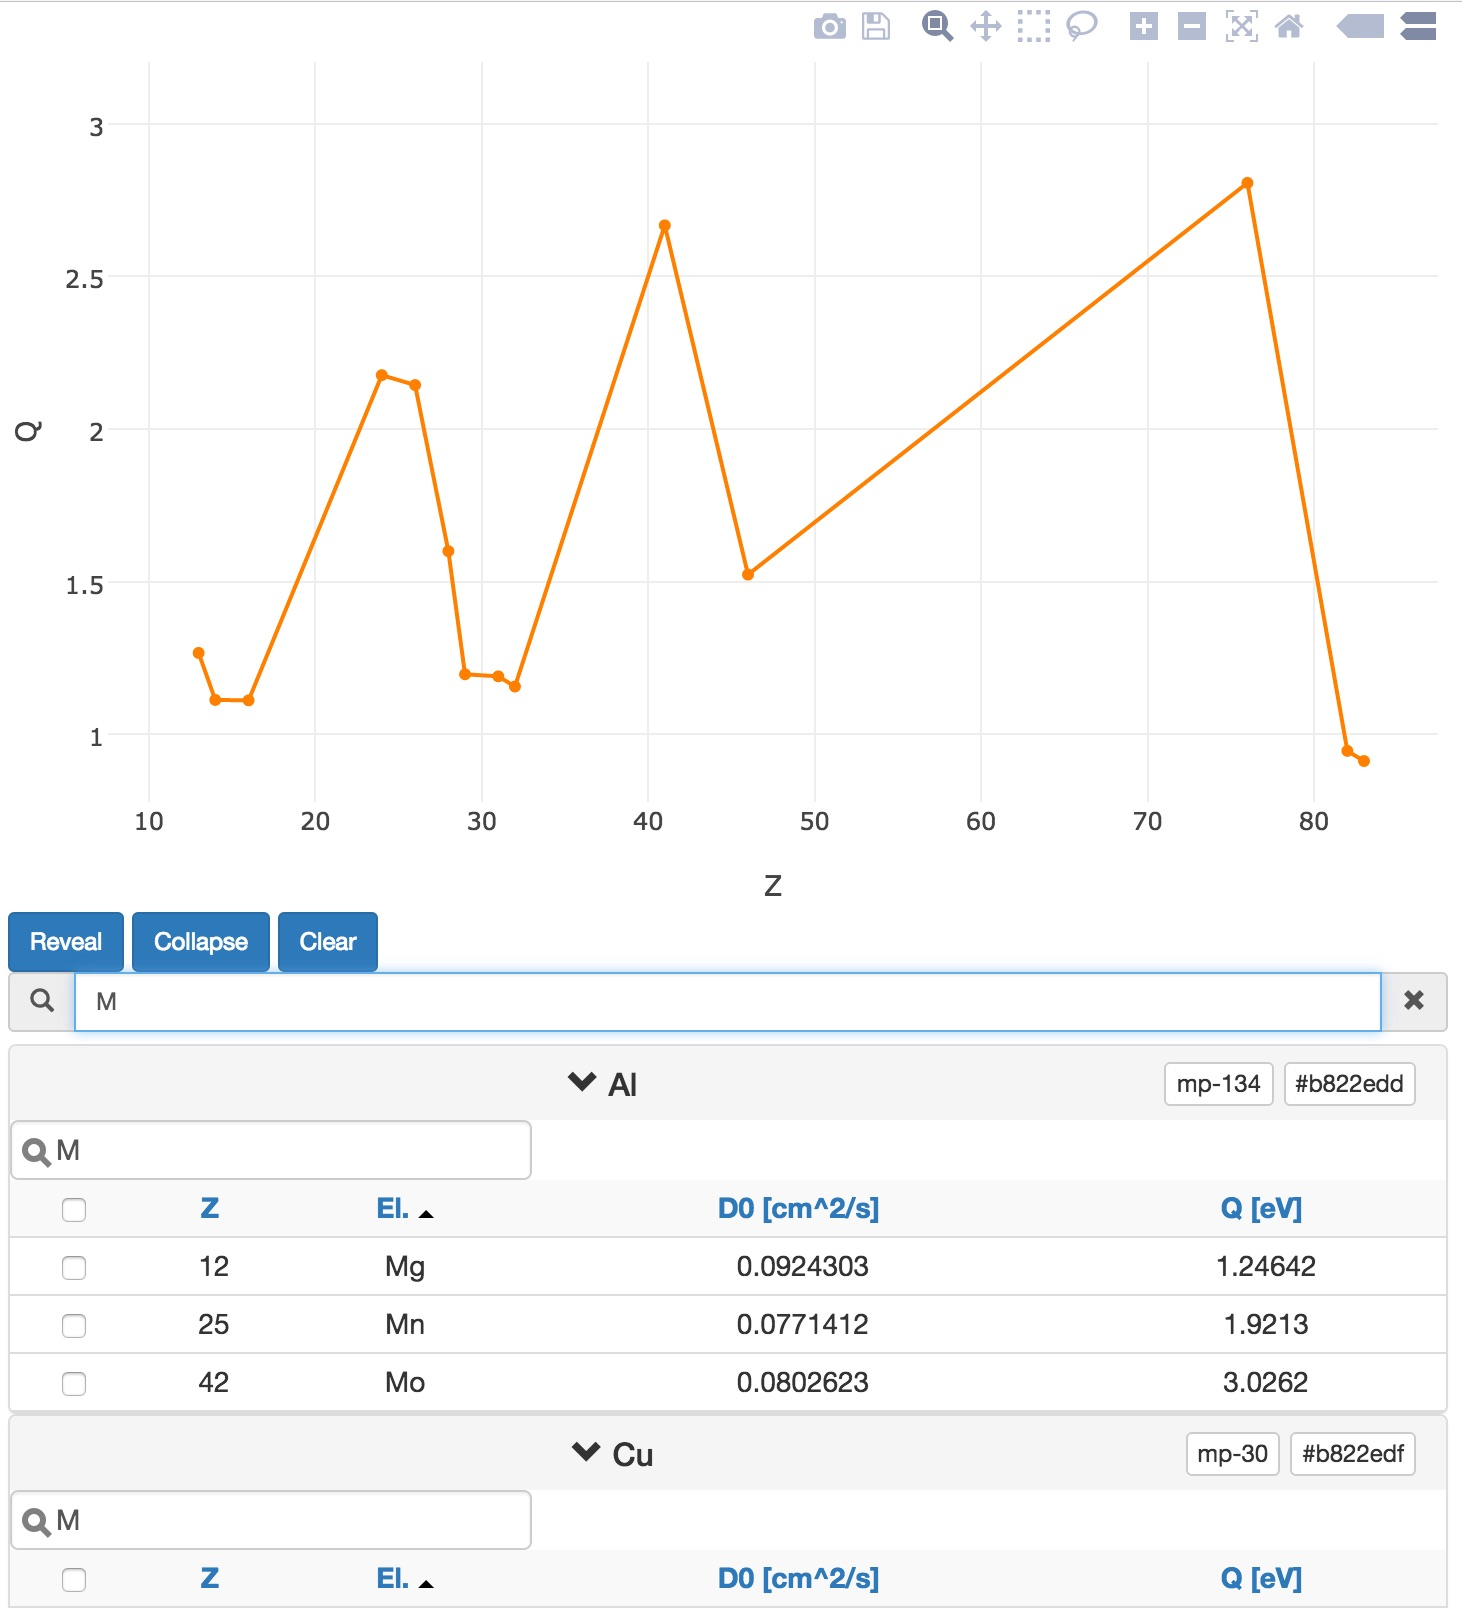

In [10]:
Image(filename="explore_uwsi2.jpg")

## MP-ALS Use Case

* input MPFile used as configuration file for spectra analysis
* spectra analysis directly on Beamline-Computer
* phase-diagram app to compare experimental and computational data
* see https://www.youtube.com/watch?v=zH-ZauYsu64 (5min)

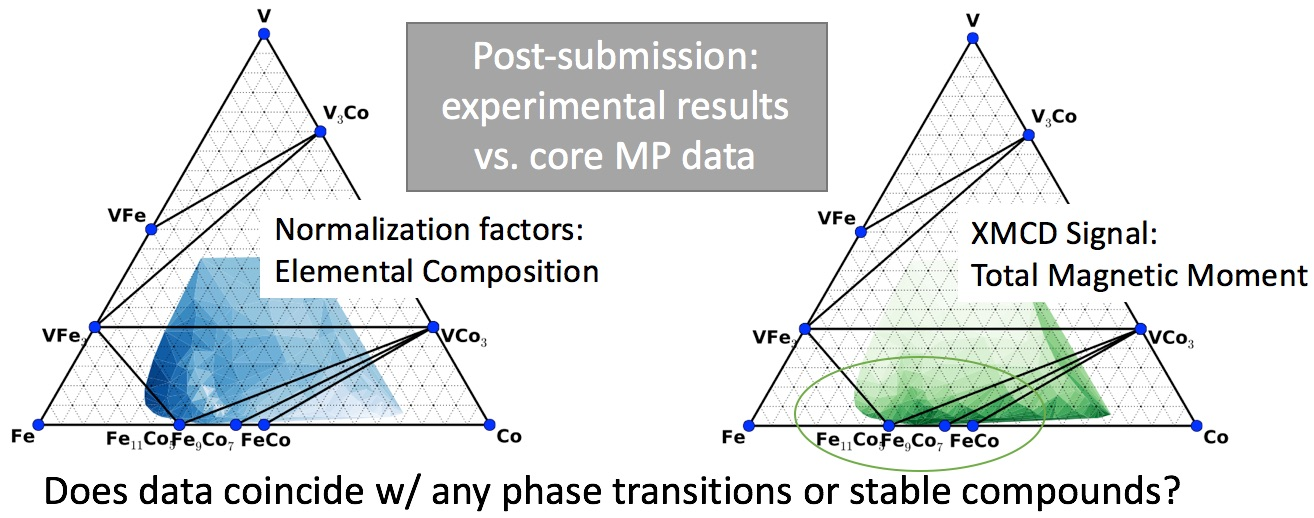

In [11]:
Image(filename="als_mp_app.jpg")

## Retrieve and Display Contribution Data

see code embedded in static notebook on contribution detail page

In [1]:
from mpcontribs.rest.rester import MPContribsRester

In [2]:
mpr = MPContribsRester(
    'Gn6tOpaHM1EAsbTr',
    endpoint='http://localhost:5000/test_site/mpcontribs/rest'
)

In [3]:
mpr.check_contributor()

{u'contributor': u'Patrick Huck',
 u'contributor_added': False,
 u'group_added': False,
 u'institution': u'LBNL',
 u'is_contrib': True}

In [4]:
mpr.query_contributions()

[{u'_id': u'57abbc33dace6e34025d3aa2',
  u'collaborators': [u'Patrick Huck'],
  u'mp_cat_id': u'mp-30'},
 {u'_id': u'57abbc37dace6e34025d3aa4',
  u'collaborators': [u'Patrick Huck'],
  u'mp_cat_id': u'mp-4'},
 {u'_id': u'57aa30e2dace6e1770757f26',
  u'collaborators': [u'Patrick Huck'],
  u'mp_cat_id': u'mp-134'}]

In [5]:
mpfile = mpr.find_contribution('57abbc33dace6e34025d3aa2')

In [6]:
mpid = mpfile.ids[0]

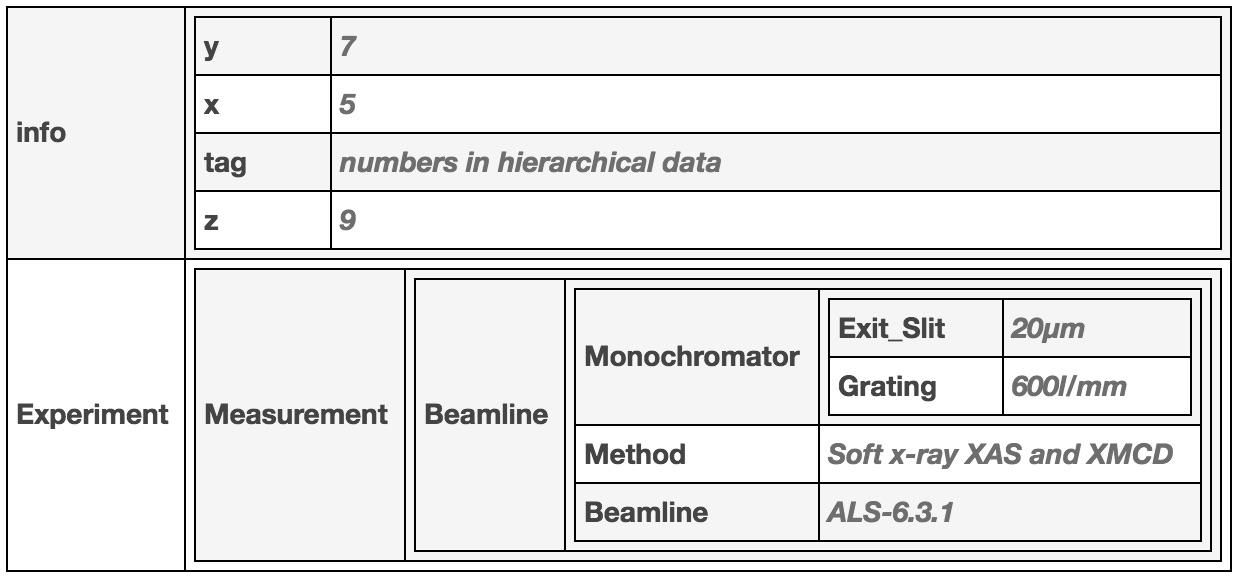

In [ ]:
mpfile.hdata[mpid]

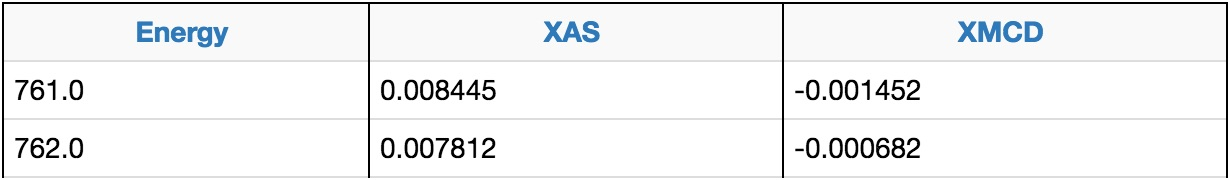

In [ ]:
mpfile.tdata[mpid]['data_table2']

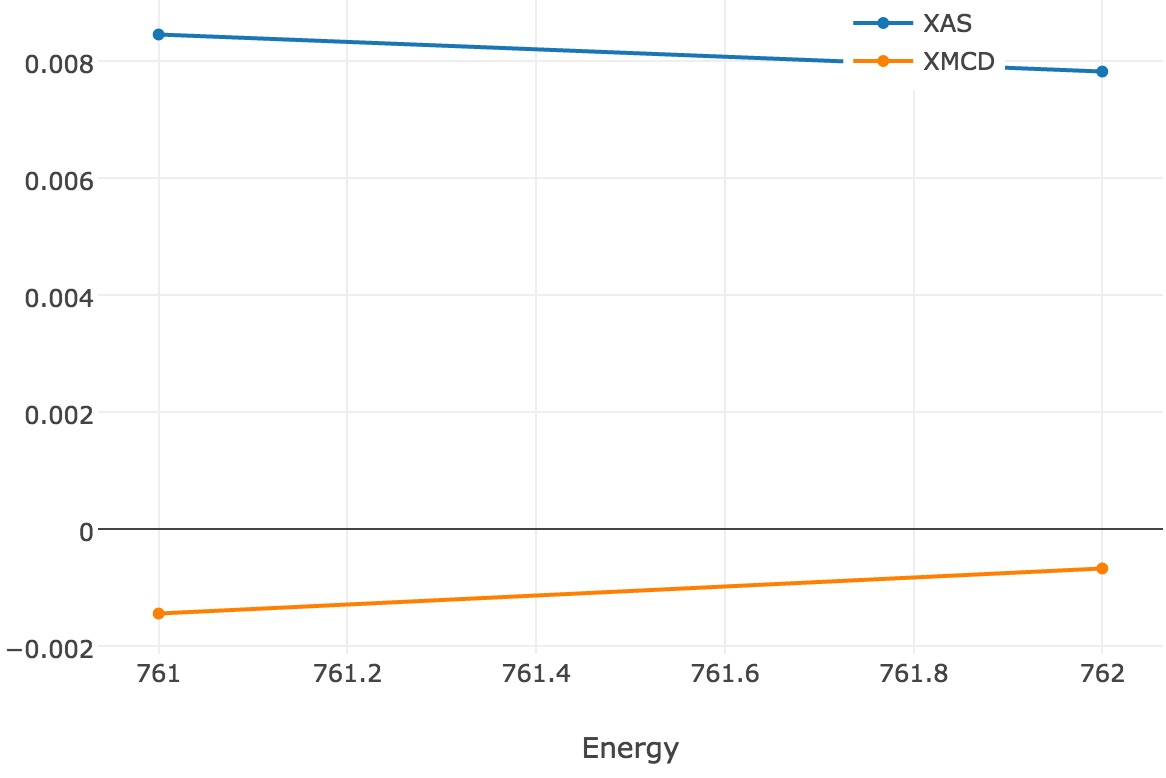

In [ ]:
mpfile.gdata[mpid]['table2']